In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# local_zip = '/content/drive/MyDrive/Colab Notebooks/horse and human.zip'
# zipref = zipfile.ZipFile(local_zip, 'r')
# zipref.extractall('/content/drive/MyDrive/Colab Notebooks')

In [3]:
base_dir  = '/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse-or-human'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'validation')

train_humans_dir = os.path.join(train_dir, 'humans')
train_horses_dir = os.path.join(train_dir, 'horses')
val_humans_dir   = os.path.join(val_dir, 'humans')
val_horses_dir   = os.path.join(val_dir, 'horses')

print(train_humans_dir, train_horses_dir, val_humans_dir, val_horses_dir, sep = '\n')



/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse-or-human/train/humans
/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse-or-human/train/horses
/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse-or-human/validation/humans
/content/drive/MyDrive/Colab Notebooks/horse-or-human/horse-or-human/validation/horses


In [4]:
print('Number of training humans images   : ', len(os.listdir(train_humans_dir)))
print('Number of training horses images   : ', len(os.listdir(train_horses_dir)))
print('Number of validation humans images : ', len(os.listdir(val_humans_dir)))
print('Number of validation horses images : ', len(os.listdir(val_horses_dir)))

Number of training humans images   :  527
Number of training horses images   :  500
Number of validation humans images :  128
Number of validation horses images :  128


(-0.5, 299.5, 299.5, -0.5)

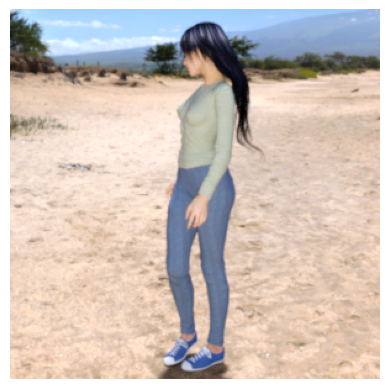

In [5]:
# Accessing and visualizing an image
humans_image_path = os.path.join(train_humans_dir, 'human01-00.png')
human_image = mpimg.imread(humans_image_path)
plt.imshow(human_image)
plt.axis('off')

(-0.5, 299.5, 299.5, -0.5)

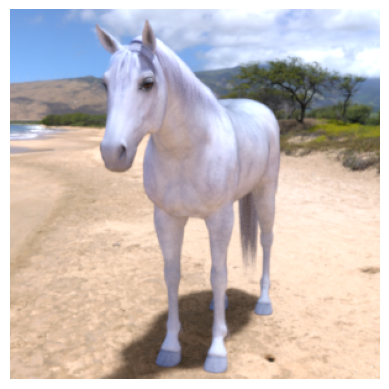

In [6]:
# Accessing and visualizing a dog image
horses_image_path = os.path.join(train_horses_dir, 'horse01-0.png')
horses_image = mpimg.imread(horses_image_path)
plt.imshow(horses_image)
plt.axis('off')

In [7]:
train_humans_images = os.listdir(train_humans_dir)[:30]
train_horses_images = os.listdir(train_horses_dir)[:30]

humans_image_paths = [os.path.join(train_humans_dir, image) for image in train_humans_images]
horses_image_paths = [os.path.join(train_horses_dir, image) for image in train_horses_images]

image_paths = humans_image_paths + horses_image_paths

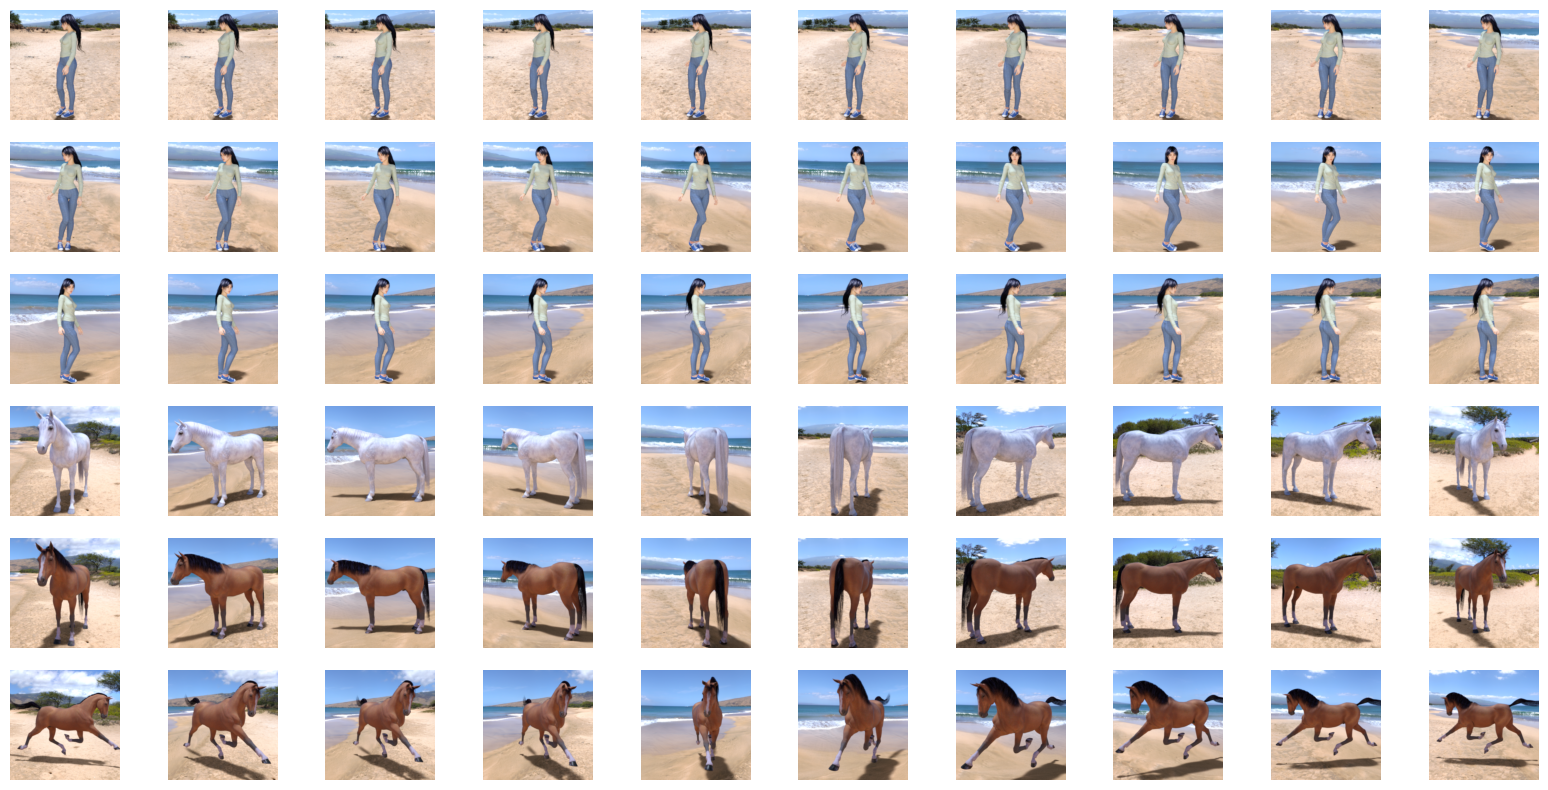

In [8]:
train_humans_images = os.listdir(train_humans_dir)[:30]
train_horses_images = os.listdir(train_horses_dir)[:30]

humans_image_paths = [os.path.join(train_humans_dir, image) for image in train_humans_images]
horses_image_paths = [os.path.join(train_horses_dir, image) for image in train_horses_images]

image_paths = humans_image_paths + horses_image_paths
plt.figure(figsize = (20,10))
for i in range(60):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    zoom_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# flow_from_directory used when data is in secondary storage
train_generator = train_datagen.flow_from_directory(
    train_dir,                              # Training directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,                               # Validation Directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
# Using transfer learning
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    input_shape = (300,300,3)
)
vgg_model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

In [11]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['Accuracy'])

In [13]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 50,
    verbose = 1
)

Epoch 1/50
21/21 [==============================] - 324s 13s/step - loss: 1.4819 - Accuracy: 0.4995 - val_loss: 1.1356 - val_Accuracy: 0.5000
Epoch 2/50
21/21 [==============================] - 50s 2s/step - loss: 0.7124 - Accuracy: 0.5180 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 3/50
21/21 [==============================] - 50s 2s/step - loss: 0.6931 - Accuracy: 0.5131 - val_loss: 0.6932 - val_Accuracy: 0.5000
Epoch 4/50
21/21 [==============================] - 49s 2s/step - loss: 0.6929 - Accuracy: 0.5131 - val_loss: 0.6933 - val_Accuracy: 0.5000
Epoch 5/50
21/21 [==============================] - 49s 2s/step - loss: 0.6928 - Accuracy: 0.5131 - val_loss: 0.6934 - val_Accuracy: 0.5000
Epoch 6/50
21/21 [==============================] - 48s 2s/step - loss: 0.6932 - Accuracy: 0.5131 - val_loss: 0.6938 - val_Accuracy: 0.5000
Epoch 7/50
21/21 [==============================] - 48s 2s/step - loss: 0.6929 - Accuracy: 0.5131 - val_loss: 0.6934 - val_Accuracy: 0.5000
Epoch 8/50
21/21 [

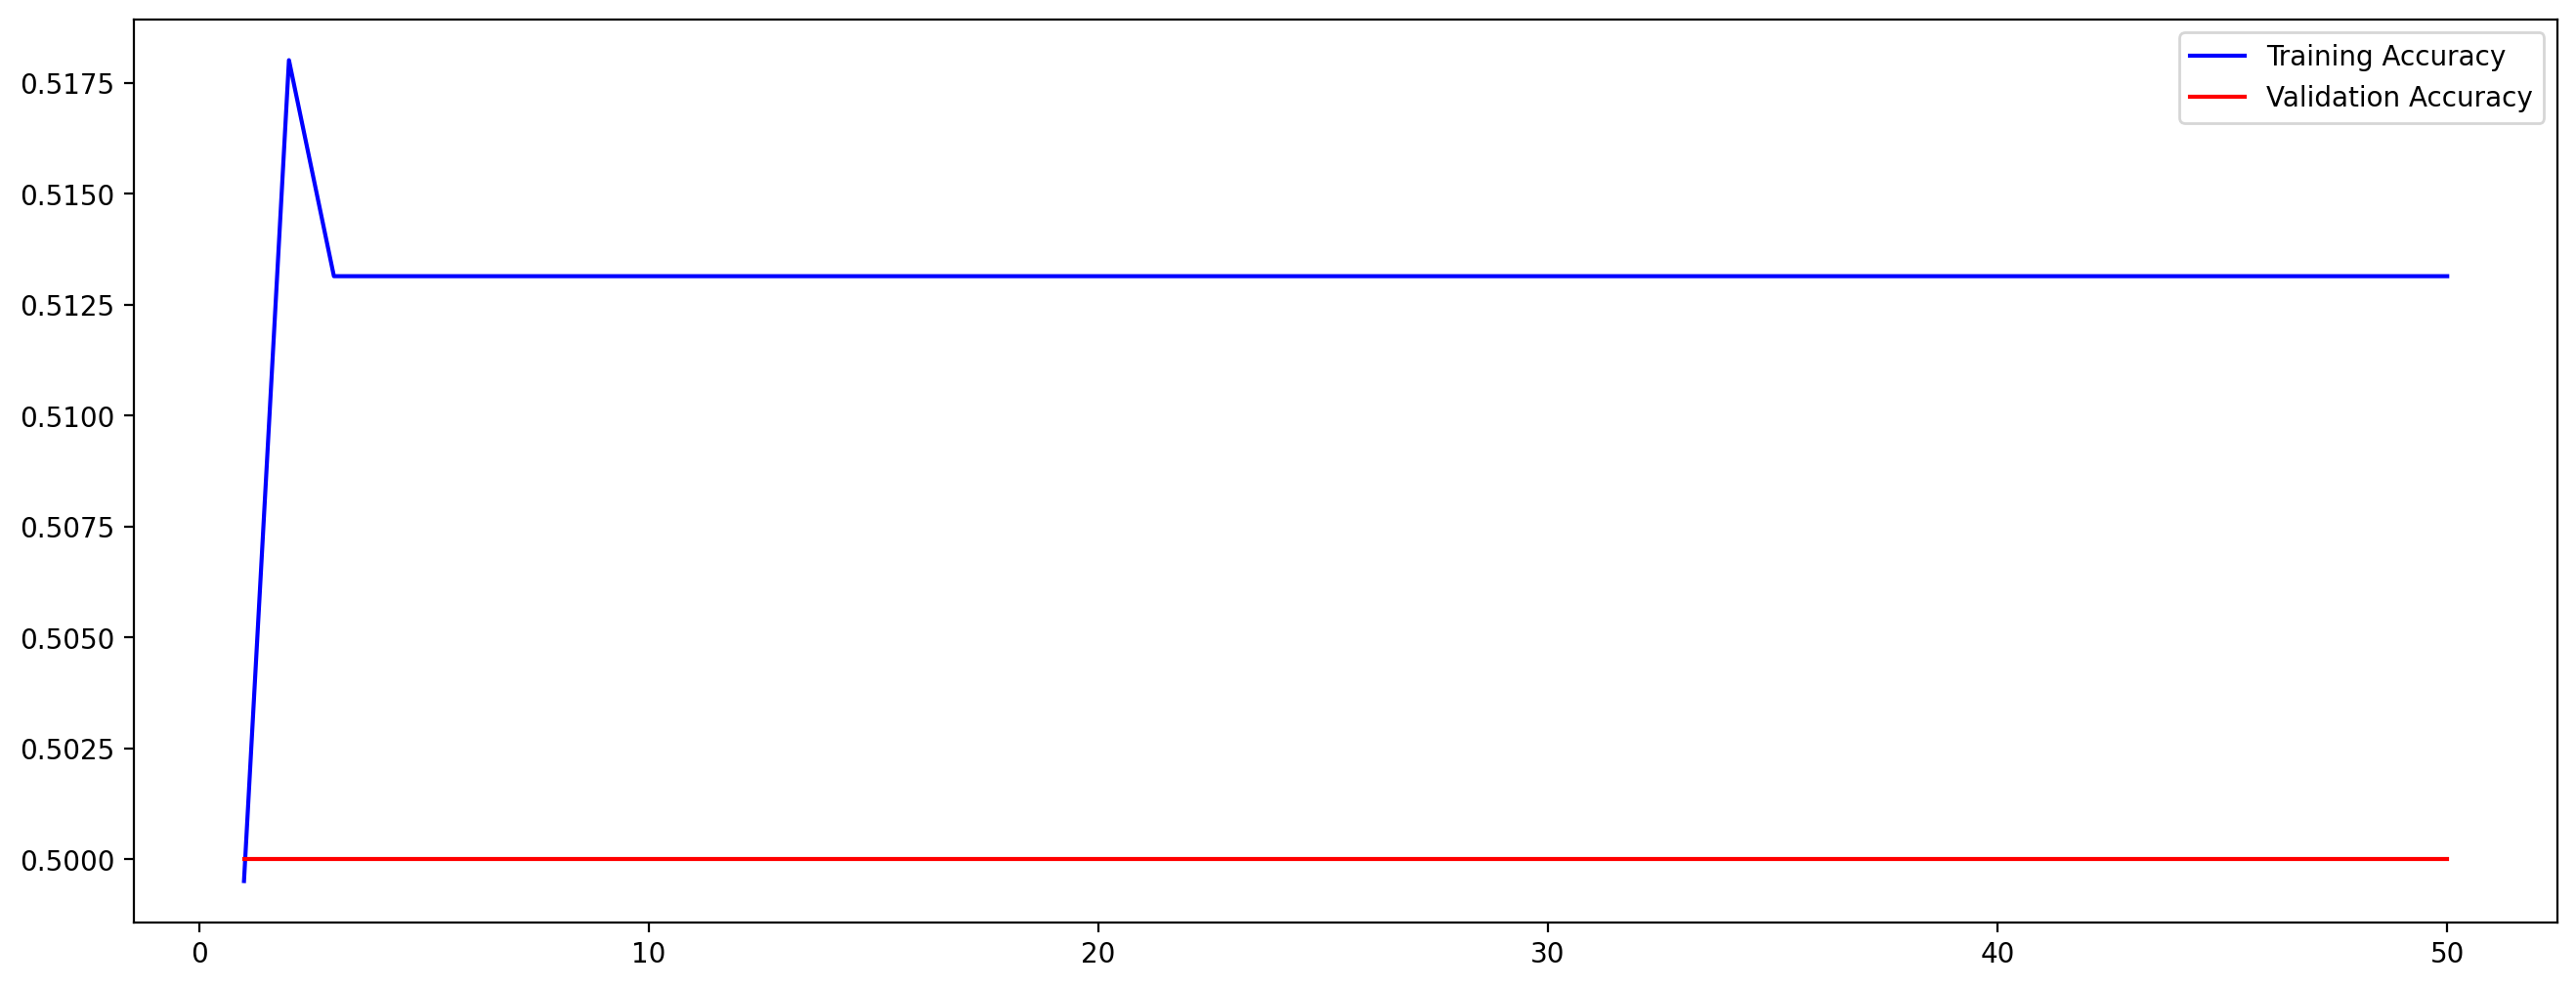

In [19]:
acc_train = history.history['Accuracy']
acc_val   = history.history['val_Accuracy']
num_epochs = range(1,51)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()